## NC Traffic Stop Data
https://opendatapolicingnc.com/

In [10]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd

In [17]:
dbname = 'traffic_stops_nc'
username = 'along528'
pswd = 'password'
con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

# Stops by all races and ethnicities by year

In [16]:
sql_query = """
SELECT count(person_id),
       p.race,
       extract(YEAR FROM s.date) AS year
FROM nc_person p
JOIN nc_stop s ON p.stop_id = s.stop_id
WHERE p.type='D'
  AND s.agency_id = 78
GROUP BY p.race,
         year
ORDER BY year ASC, p.race DESC;
"""
stops = pd.read_sql_query(sql_query,con)
stops

,count,race,year
0,2533,W,2002
1,547,U,2002
2,33,I,2002
3,2163,B,2002
4,87,A,2002
5,1863,W,2003
6,303,U,2003
7,16,I,2003
8,1596,B,2003
9,55,A,2003


# Likelihood-of-search by stop-reason

In [4]:
sql_query = """
SELECT count(se.person_id),
       p.race,
       s.purpose,
       extract(YEAR FROM s.date) AS year
FROM  nc_person p
JOIN nc_stop s ON p.stop_id = s.stop_id
JOIN nc_search se ON s.stop_id = se.stop_id
WHERE p.type='D'
  AND s.agency_id = 78
GROUP BY p.race,
         s.purpose,
         year
ORDER BY year ASC,
         s.purpose ASC,
         p.race DESC;
"""
search = pd.read_sql_query(sql_query,con)
search

,count,race,purpose,year
0,24,W,1,2002
1,3,U,1,2002
2,1,I,1,2002
3,25,B,1,2002
4,9,W,2,2002
5,4,U,2,2002
6,13,B,2,2002
7,20,W,3,2002
8,14,U,3,2002
9,12,B,3,2002


# Use-of-force

In [5]:
sql_query="""
SELECT count(se.person_id),
       p.race,
       extract(YEAR FROM s.date) AS year
FROM nc_person p
JOIN nc_stop s ON p.stop_id = s.stop_id
JOIN nc_search se ON s.stop_id = se.stop_id
WHERE p.type='D'
  AND s.agency_id = 78
  AND s.engage_force = 't'
GROUP BY p.race,
         year
ORDER BY p.race DESC,
         year ASC;
"""
force = pd.read_sql_query(sql_query,con)
force

,count,race,year
0,1,W,2006
1,1,W,2007
2,1,W,2008
3,2,W,2010
4,1,W,2012
5,1,W,2013
6,1,W,2015
7,1,U,2015
8,4,B,2002
9,4,B,2005


# Search rate

In [6]:
sql_query="""
SELECT count(se.person_id),
       p.race,
       extract(YEAR FROM s.date) AS year
FROM nc_person p
JOIN nc_stop s ON p.stop_id = s.stop_id
JOIN nc_search se ON s.stop_id = se.stop_id
WHERE p.type='D'
  AND s.agency_id = 78
GROUP BY p.race,
         year
ORDER BY year ASC,
         p.race DESC;
"""
search_rate = pd.read_sql_query(sql_query,con)
search_rate

,count,race,year
0,119,W,2002
1,37,U,2002
2,3,I,2002
3,140,B,2002
4,3,A,2002
5,29,W,2003
6,13,U,2003
7,1,I,2003
8,37,B,2003
9,1,A,2003


# Contraband Hit Rate

In [7]:
sql_query="""
SELECT count(c.person_id),
       p.race,
       extract(YEAR FROM s.date) AS year
FROM nc_person p
JOIN nc_stop s ON p.stop_id = s.stop_id
JOIN nc_search se ON s.stop_id = se.stop_id
JOIN nc_contraband c ON se.search_id = c.search_id
WHERE p.type='D'
  AND s.agency_id = 78
GROUP BY p.race,
         year
ORDER BY year ASC,
         p.race DESC;
"""
hit_rate = pd.read_sql_query(sql_query,con)
hit_rate

,count,race,year
0,43,W,2002
1,11,U,2002
2,1,I,2002
3,56,B,2002
4,2,A,2002
5,13,W,2003
6,3,U,2003
7,12,B,2003
8,1,A,2003
9,35,W,2004


In [8]:
# The usual preamble
%matplotlib inline
#%pylab inline
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

plt.rcParams['figure.figsize'] = (15, 5)

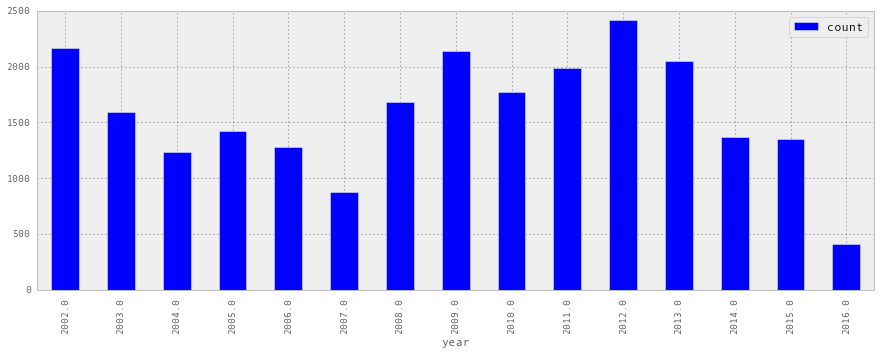

In [9]:
stops_black = stops[stops['race']=='B']\
              .set_index('year').drop(['race'],axis=1).plot(kind='Bar')
